In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('StudentPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
5,female,group B,associate's degree,standard,none,71,83.0,78.0
6,female,group B,some college,standard,completed,88,95.0,92.0
7,male,group B,some college,free/reduced,none,40,43.0,39.0
8,male,group D,high school,free/reduced,completed,64,64.0,67.0
9,female,group B,high school,free/reduced,none,38,60.0,50.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df = df.dropna(how = "any", axis = 0)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       978 non-null    object 
 1   race/ethnicity               978 non-null    object 
 2   parental level of education  978 non-null    object 
 3   lunch                        978 non-null    object 
 4   test preparation course      978 non-null    object 
 5   math score                   978 non-null    object 
 6   reading score                978 non-null    float64
 7   writing score                978 non-null    float64
dtypes: float64(2), object(6)
memory usage: 68.8+ KB


In [8]:
df['math score'].value_counts()

math score
?     35
65    35
62    33
59    31
69    29
      ..
0      1
33     1
19     1
23     1
8      1
Name: count, Length: 85, dtype: int64

In [9]:
df.drop(df.index[df['math score'] == '?'], inplace = True)

In [10]:
df['math score'].value_counts()

math score
65    35
62    33
59    31
69    29
68    26
      ..
0      1
33     1
19     1
23     1
8      1
Name: count, Length: 84, dtype: int64

In [11]:
df = df.astype({'math score' : float})

<Axes: xlabel='count', ylabel='math score'>

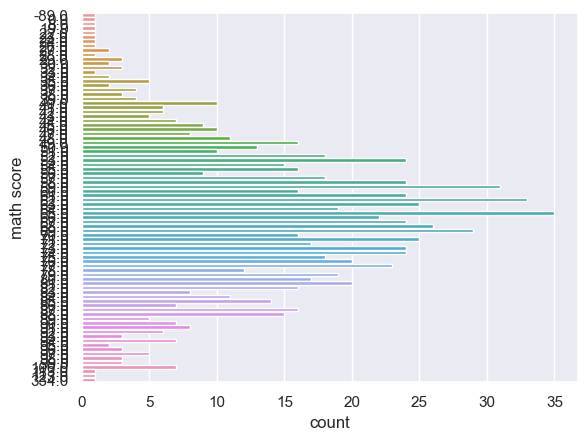

In [12]:
sns.countplot(data=df, y = 'math score')

<Axes: xlabel='count', ylabel='gender'>

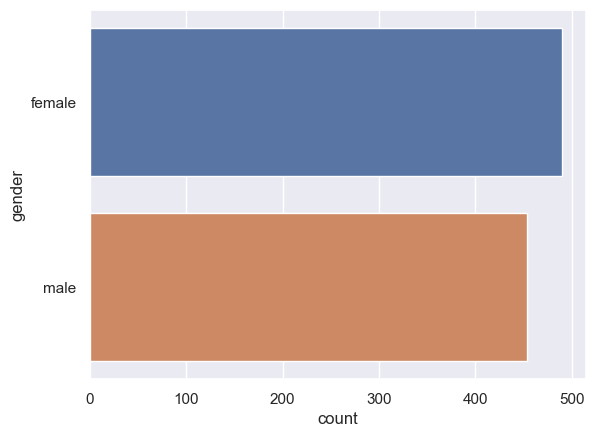

In [13]:
sns.countplot(data=df, y = 'gender')

Text(0.5, 1.0, 'Matrix')

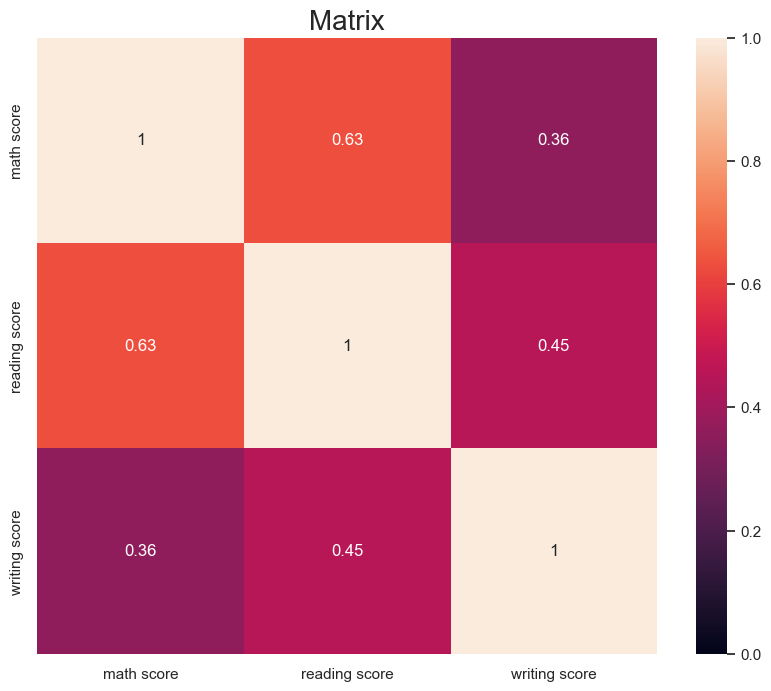

In [14]:
plt.figure(figsize=(10,8))
var_list = ['math score', 'reading score', 'writing score']  # Replace var1, var2, var3 with your actual variable names

# Select only the columns you're interested in from the DataFrame
df_selected = df[var_list]
sns.heatmap(df_selected.corr().round(2), annot=True, vmin=0)
plt.title('Matrix', size=20)

[Text(0.5, 1.0, 'math gender')]

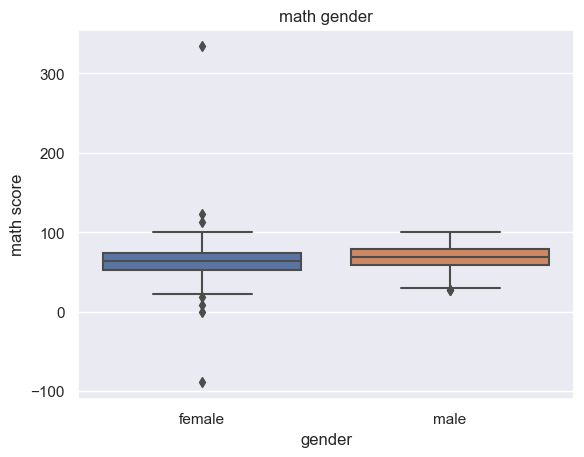

In [15]:
sns.boxplot(data=df, x='gender', y='math score').set(title = 'math gender')

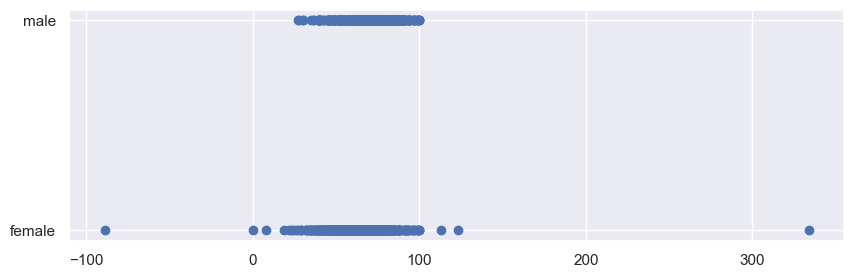

In [16]:
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(df['math score'], df['gender'])
plt.show()

<Axes: >

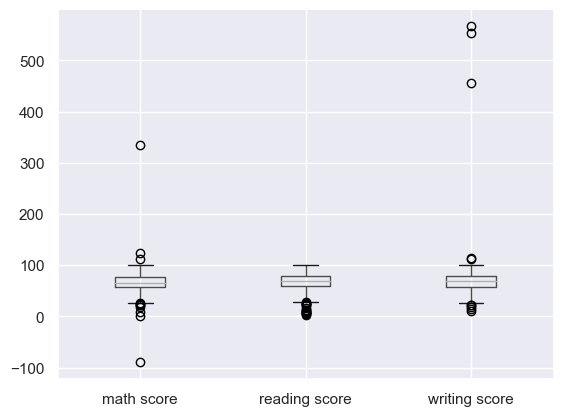

In [17]:
col = ['math score', 'reading score', 'writing score']
df.boxplot(col)

In [18]:
from scipy import stats
z = np.abs(stats.zscore(df['math score']))

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(z)

0       0.311841
1       0.148441
2       1.292242
3       1.049827
4       0.529708
5       0.257374
6       1.183308
7       1.431094
8       0.123893
9       1.540028
10      0.450693
11      1.431094
12      0.069426
13      0.638641
14      0.886427
15      0.148441
16      1.183308
24      0.420774
25      0.366307
26      0.148441
27      0.039507
29      0.232826
30      0.148441
31      0.178360
32      0.559627
33      1.431094
35      0.802041
36      0.420774
37      0.886427
39      0.505160
40      0.614093
41      0.450693
42      0.723027
43      0.396227
44      0.886427
45      0.069426
46      0.614093
47      0.014960
48      0.505160
49      0.856508
50      0.723027
51      0.584174
52      0.723027
53      1.183308
54      0.257374
55      1.812361
56      0.856508
57      0.777494
58      0.450693
59      3.609763
60      0.693108
61      1.485561
62      0.232826
63      0.148441
64      0.396227
65      0.039507
66      1.158761
67      0.341760
68      0.2872

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       943 non-null    object 
 1   race/ethnicity               943 non-null    object 
 2   parental level of education  943 non-null    object 
 3   lunch                        943 non-null    object 
 4   test preparation course      943 non-null    object 
 5   math score                   943 non-null    float64
 6   reading score                943 non-null    float64
 7   writing score                943 non-null    float64
dtypes: float64(3), object(5)
memory usage: 66.3+ KB


In [20]:
df.describe()

,math score,reading score,writing score
count,943.000000,943.000000,943.000000
mean,66.274655,68.489926,69.650053
std,18.369580,15.994348,30.115181
min,-89.000000,3.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,334.000000,100.000000,567.000000


In [30]:
def calculate_iqr(df , column):

    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
 
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

calculate_iqr(df,'writing score')

The IQR is 21.0
The lower bound value is 26.5
The upper bound value is 110.5
Total number of outliers are 10


In [31]:
calculate_iqr(df,'math score')

The IQR is 20.0
The lower bound value is 27.0
The upper bound value is 107.0
Total number of outliers are 11


In [32]:
calculate_iqr(df,'reading score')

The IQR is 20.0
The lower bound value is 29.0
The upper bound value is 109.0
Total number of outliers are 17


C:\Users\Anshika\AppData\Local\Temp\ipykernel_1704\597554975.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.WS, kde=False)


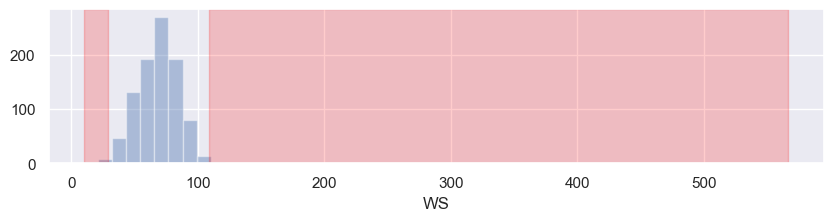

In [43]:
df1 = df.rename(columns={'writing score': 'WS', 'reading score': 'RS', 'math score': 'MS'})
plt.figure(figsize = (10,2))
sns.distplot(df1.WS, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WS.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WS.max(),alpha=0.2, color='red')

C:\Users\Anshika\AppData\Local\Temp\ipykernel_1704\1590387452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.RS, kde=False)


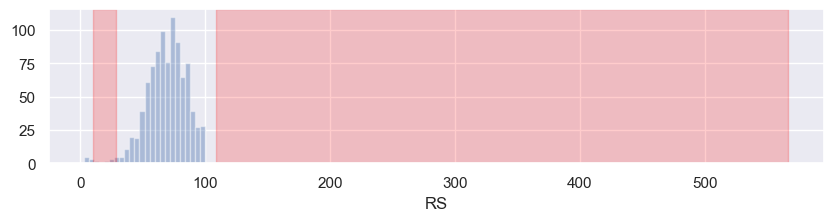

In [45]:
plt.figure(figsize = (10,2))
sns.distplot(df1.RS, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WS.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WS.max(),alpha=0.2, color='red')

C:\Users\Anshika\AppData\Local\Temp\ipykernel_1704\2531672041.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.MS, kde=False)


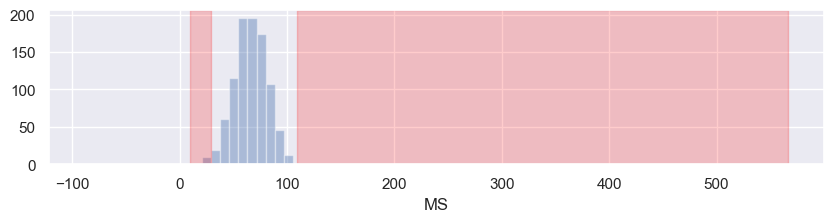

In [46]:
plt.figure(figsize = (10,2))
sns.distplot(df1.MS, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WS.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WS.max(),alpha=0.2, color='red')

In [48]:
# Removing outliers in Writing Score
median=np.median(df['writing score'])
median

69.0

In [56]:
new_data=df
new_data['writing score'] = np.where(new_data['writing score'] > upper, median,new_data['writing score'])
new_data['writing score'] = np.where(new_data['writing score'] < lower, median, new_data['writing score'])

In [57]:
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [58]:
new_data['reading score'] = np.where(new_data['reading score'] > upper, median,new_data['reading score'])
new_data['reading score'] = np.where(new_data['reading score'] < lower, median, new_data['reading score'])

In [59]:
new_data['math score'] = np.where(new_data['math score'] > upper, median,new_data['math score'])
new_data['math score'] = np.where(new_data['math score'] < lower, median, new_data['math score'])

In [60]:
new_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


C:\Users\Anshika\AppData\Local\Temp\ipykernel_1704\3656302970.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.WS, kde=False)


AttributeError: 'DataFrame' object has no attribute 'WT'

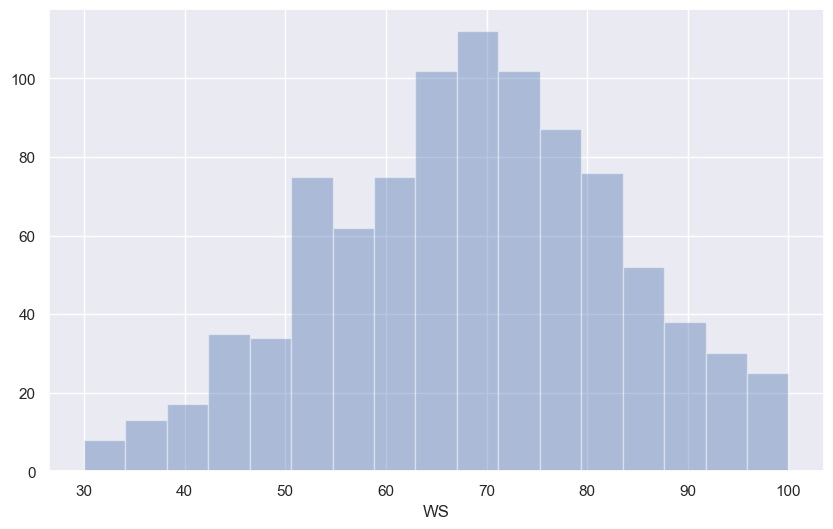

In [62]:
df1 = new_data.rename(columns={'writing score': 'WS', 'reading score': 'RS', 'math score': 'MS'})

plt.figure(figsize = (10,6))
sns.distplot(df1.WS, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WT.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WT.max(),alpha=0.2, color='red')

C:\Users\Anshika\AppData\Local\Temp\ipykernel_1704\1154442365.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.MS, kde=False)


AttributeError: 'DataFrame' object has no attribute 'WT'

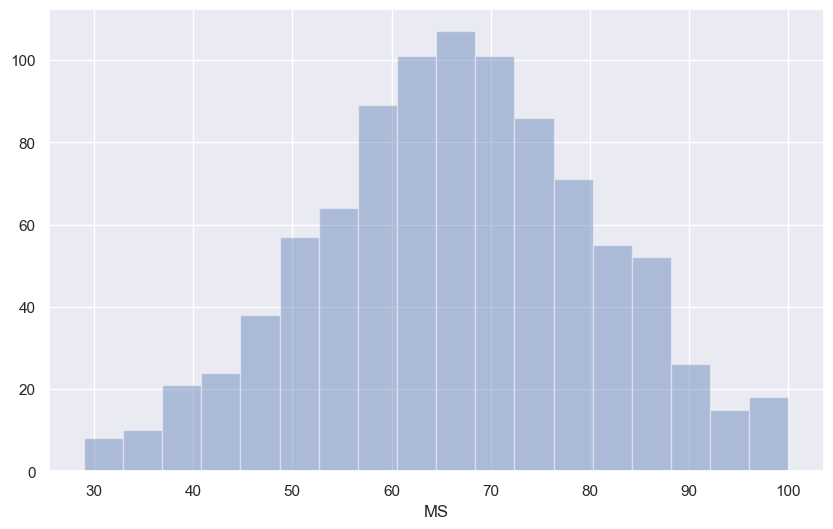

In [63]:
plt.figure(figsize = (10,6))
sns.distplot(df1.MS, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WT.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WT.max(),alpha=0.2, color='red')

C:\Users\Anshika\AppData\Local\Temp\ipykernel_1704\3614465120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.RS, kde=False)


AttributeError: 'DataFrame' object has no attribute 'WT'

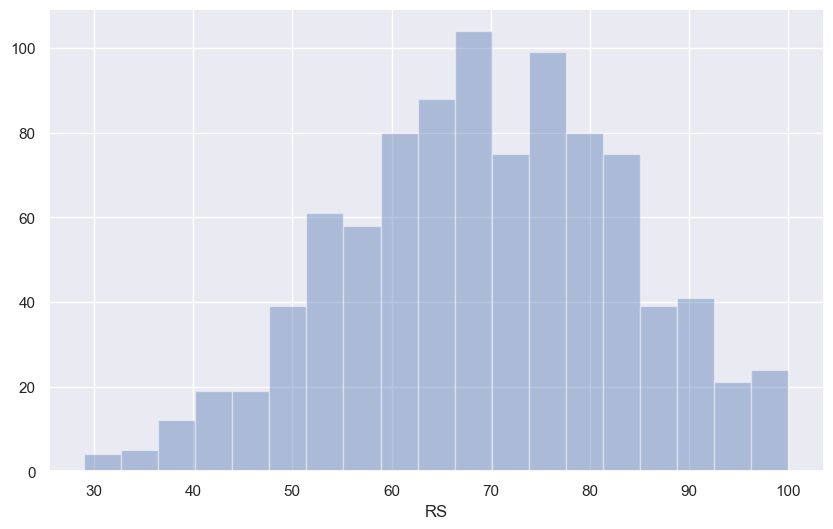

In [65]:
plt.figure(figsize = (10,6))
sns.distplot(df1.RS, kde=False)
plt.axvspan(xmin = lower,xmax= df1.WT.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df1.WT.max(),alpha=0.2, color='red')

<Axes: >

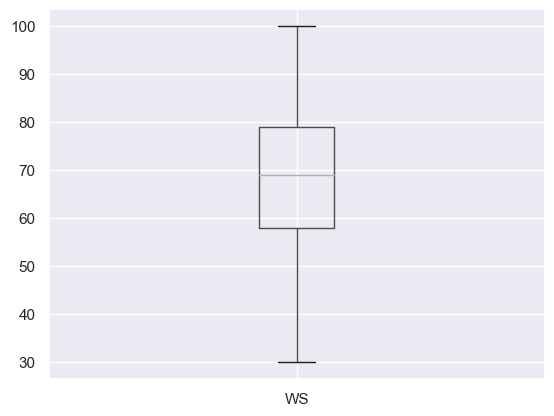

In [68]:
df1.boxplot('WS')

<Axes: >

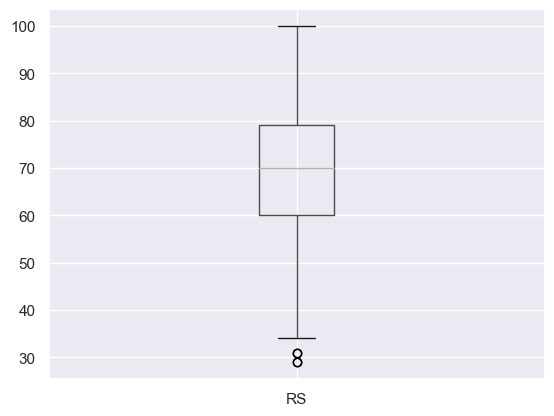

In [69]:
df1.boxplot('RS')

<Axes: >

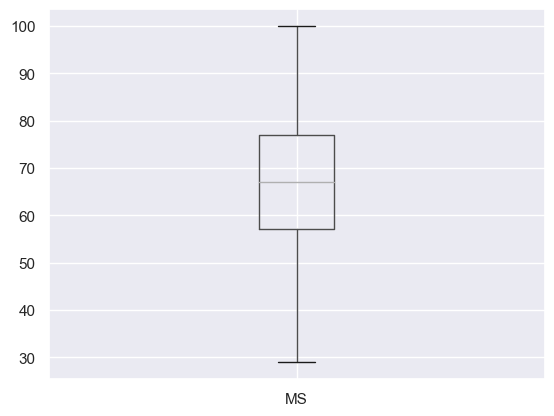

In [70]:
df1.boxplot('MS')